## Notes about K means clustering

K Means clustering: unsupervised machine learning that identifies clusters of data.


*   What is clustering?: Clustering is partitioning data into groups. The cluster objects are more similar to intracluster objects than intercluster objects. Clustering helps identify meaningfullness and usefulness. Meaningful clusters expand knowledge, for example clustering used to identify patient groups that respond to different medical treatments. Useful clusters serve as an intermediate step in a data pipeline, such as customer segmentation.
*   What are the clustering techniques?: Three popular ones are partitioning clustering, hierarchical clustering, and density-based clustering.
*   Partitional Clustering: divides data into non-overlapping groups. They are non-deterministic algorithms. Pros: work well with clusters that have spherical shape, scalable. Cons: Not suited for clusters with complex shapes, not good with clusters of different densities.
*   Hierarchical Clustering: determines cluster assignments by building hierarchy. Bottom-up or top-up approaches. Agglomerative clustering is a bottom up approach that merges two points that are most similar until all the points are merged in a single cluster. Divisive clustering is a top down approach. All points are one cluster, and it splits least similar clusters at each step until there's only one data point. Hierarchical clustering is deterministic. Pros: they give finer details of relationships between data objects, and they give an interpretable dendrogram. Cons: computationally expensive, sensitive to noise and outliers.
*   Density based clustering: determines cluster assignments based on density of data points in regions. Doesn't require number of clusters to be specified, instead distance parameter is specified. Examples include: Density-based spatial clustering of applications with noise (DBSCAN), Ordering Points to Identify the CLustering Structure (OPTICS). Pros: excel with nonspherical clusters, resistant to outliers. Cons: not suited to high dimensionality data, bad at identifying clusters of varying densities.
*   What is K-Means Clustering?: K Means Clustering is a partitioning clustering method. It is also called a Centroid-based clustering method. It organizes data into non-hierarchical clusters. It is efficient but sensitive to initial conditions and outliers, and is non deterministic as the initial centroids are randomly selected. It follows a two-step expectation-maximization process. Expectation step assigns data to nearest centroid. Maximization step computes the mean of all points in each cluster and sets a new centroid. This repeats until the centroid positions stop changing or a pre-set number of iterations is reached. The quality of the cluster assignments is done by computing the sum of squared error, which is the sum of the squared euclidean distance of each point to it's centroid. The objective of kmeans is to optimize SSE.
*   When to use K-Means Clustering?:








## KMeans from scratch:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

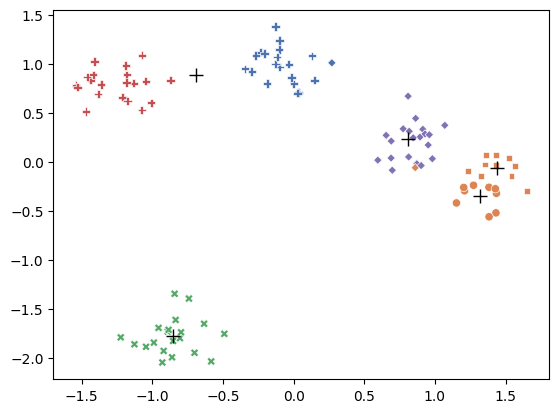

In [ ]:
from inspect import classify_class_attrs
centers = 5
# Create a data set of 2D distributions
X_train, true_labels = make_blobs(n_samples = 100, centers =centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)
# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)
# view results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None)
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         'k+',
         markersize=10
         )
plt.show()

## KMeans using Sci-Kit Learn

In [ ]:
pip install kneed

In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features, true_labels = make_blobs(
    n_samples = 300,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [ ]:
features[:5]

array([[ -8.14286966,  -9.21718161],
       [ -9.24576395,  -7.93763734],
       [ -0.24719911,   5.65696609],
       [  4.04125553,   4.99480603],
       [-12.48446966,  -9.65234695]])

In [ ]:
true_labels[:5]

array([2, 2, 0, 1, 2])

KMeans clustering needs standardization

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[-1.16966133, -1.47111779],
       [-1.36689329, -1.29273268],
       [ 0.24233125,  0.60253182],
       [ 1.00924092,  0.5102181 ],
       [-1.94607506, -1.53178549]])

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

105.43834165205627

In [ ]:
kmeans.cluster_centers_

array([[-0.20651412,  1.0689212 ],
       [-0.95632267, -1.18100061],
       [ 1.20518784,  0.08248636]])

In [ ]:
kmeans.n_iter_

5

In [ ]:
kmeans.labels_[:5]

array([1, 1, 0, 2, 1], dtype=int32)

Evaluating KMeans -- Elbow plots and silhouette coefficients

In [ ]:
kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42,
}
#List to hold sse's
sse=[]
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)


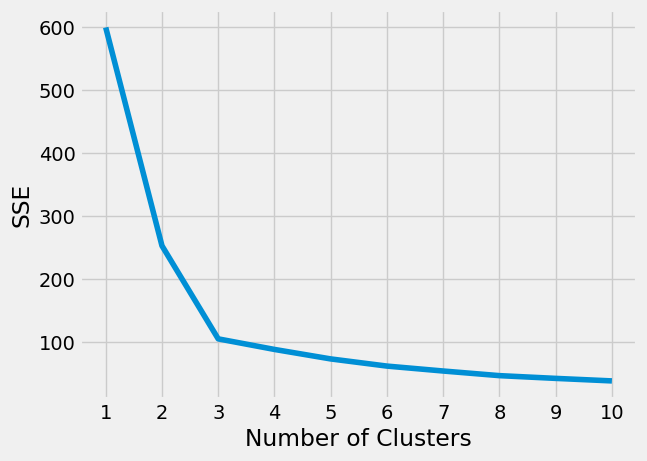

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
sse

[600.0,
 253.32204554734847,
 105.43834165205627,
 88.64584088068722,
 73.58397075913194,
 62.204619047863616,
 54.38147823937116,
 47.035087057655666,
 42.67038386965254,
 38.662181377333724]

In [ ]:
#sse_for_n_init

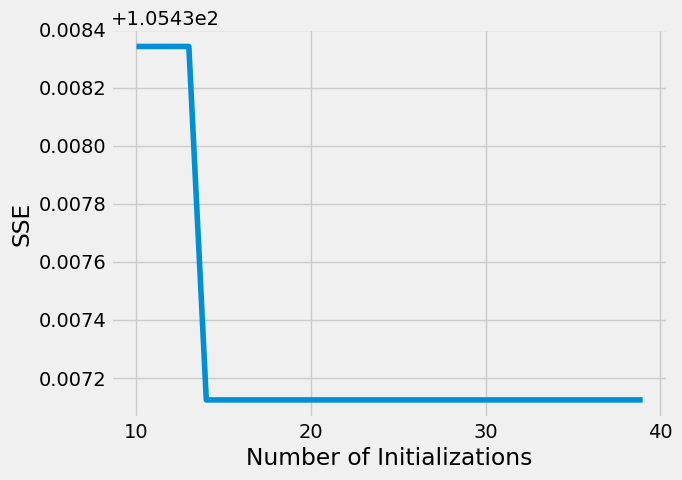

In [ ]:
kmeans_kwargs = {
    "init":"random",
    #"n_init":10,
    "max_iter":300,
    "random_state":42,
}
#List to hold sse's
sse_for_n_init=[]
for k in range(10,40):
  kmeans = KMeans(n_clusters=3, init="random", n_init=k,max_iter=300,random_state=42)
  #kmeans = KMeans(n_clusters=3,"n_init"=k, "init":"random", "max_iter":300,"random_state":42)
  kmeans.fit(scaled_features)
  sse_for_n_init.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(10,40), sse_for_n_init)
plt.figsize=(10,10)
plt.xticks((10,20,30,40))
#plt.yticks((70, 74, 76, 80, 84))
plt.xlabel("Number of Initializations")
plt.ylabel("SSE")
plt.show()

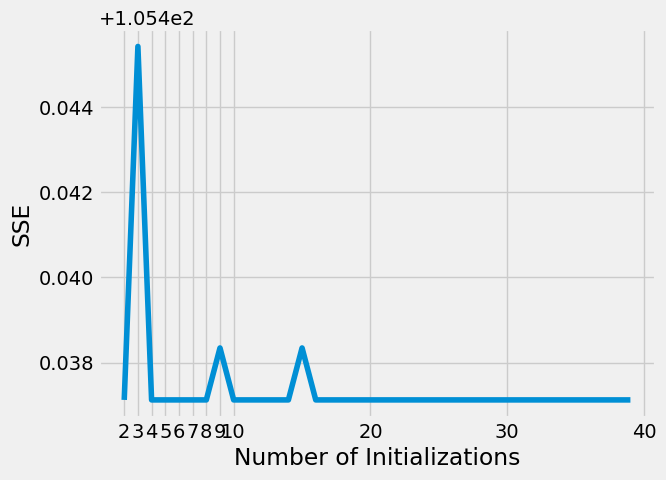

In [ ]:
kmeans_kwargs = {
    "init":"random",
    "n_init":10,
    "max_iter":300,
    "random_state":42,
}
#List to hold sse's
sse_for_n_init=[]
for k in range(2,40):
  kmeans = KMeans(n_clusters=3, init="random", n_init=k,max_iter=300)#, random_state=42)
  #kmeans = KMeans(n_clusters=3,"n_init"=k, "init":"random", "max_iter":300,"random_state":42)
  kmeans.fit(scaled_features)
  sse_for_n_init.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2,40), sse_for_n_init)
plt.figsize=(10,10)
plt.xticks((2,3,4,5,6,7,8,9,10, 20, 30, 40))
#plt.yticks((70, 74, 76, 80, 84))
plt.xlabel("Number of Initializations")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1,11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

In [ ]:
# list of silhouette_coefficients
silhouette_coefficients = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

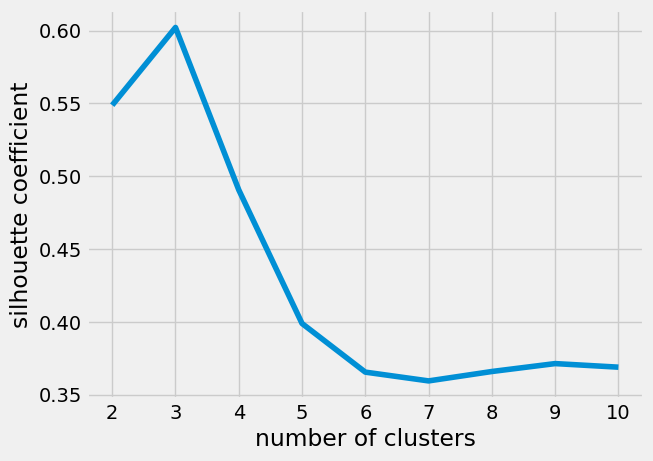

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficient")
plt.show()

In [ ]:
import tarfile
import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"

# build URL
full_download_url = urllib.parse.urljoin(uci_tcga_url, archive_name)

# download file
r = urllib.request.urlretrieve (full_download_url, archive_name)

# extract the data from archive
tar = tarfile.open(archive_name, "r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"

data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(1,20532),
    skip_header=1
)

true_label_names = np.genfromtxt(
    labels_file,
    delimiter=",",
    usecols=(1,),
    skip_header=1,
    dtype="str"
)

In [ ]:
data[:5, :3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
true_label_names[:5]

array(['PRAD', 'LUAD', 'PRAD', 'PRAD', 'BRCA'], dtype='<U4')

These labels correspond to cancer types:
*  BRCA: Breast Invasive Carcinoma
*  COAD: Colon adenocarcinoma
*  KIRC: Kidney renal clear cell carcinoma
*  LUAD: Lung adenocarcinoma
*  PRAD: Prostate adenocarcinoma

To use these labels, we need to label encode

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([4, 3, 4, 4, 0])

In [ ]:
n_clusters=len(label_encoder.classes_)
label_encoder.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

Preprocessing pipeline: PCA for dimensionality reduction since there's over 20k features. MinMaxScaler since I don't assume that the shape of the features follow a normal distribution.

In [ ]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
     ("pca", PCA(n_components=2, random_state=42)),
    ]
)

Separate pipeline for clustering

In [ ]:
clusterer = Pipeline(
    [
        (
            "kmeans",
         KMeans(
             n_clusters=n_clusters,
             init="k-means++",
             n_init=50,
             max_iter=500,
             random_state=42,
         )
        )
    ]
)

In [ ]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
     ("clusterer", clusterer)
    ]
)

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=5, n_init=50,
                                         random_state=42))]))])

In [ ]:
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.5118775528450306

In [ ]:
adjusted_rand_score(true_labels, predicted_labels)

0.722276752060253

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

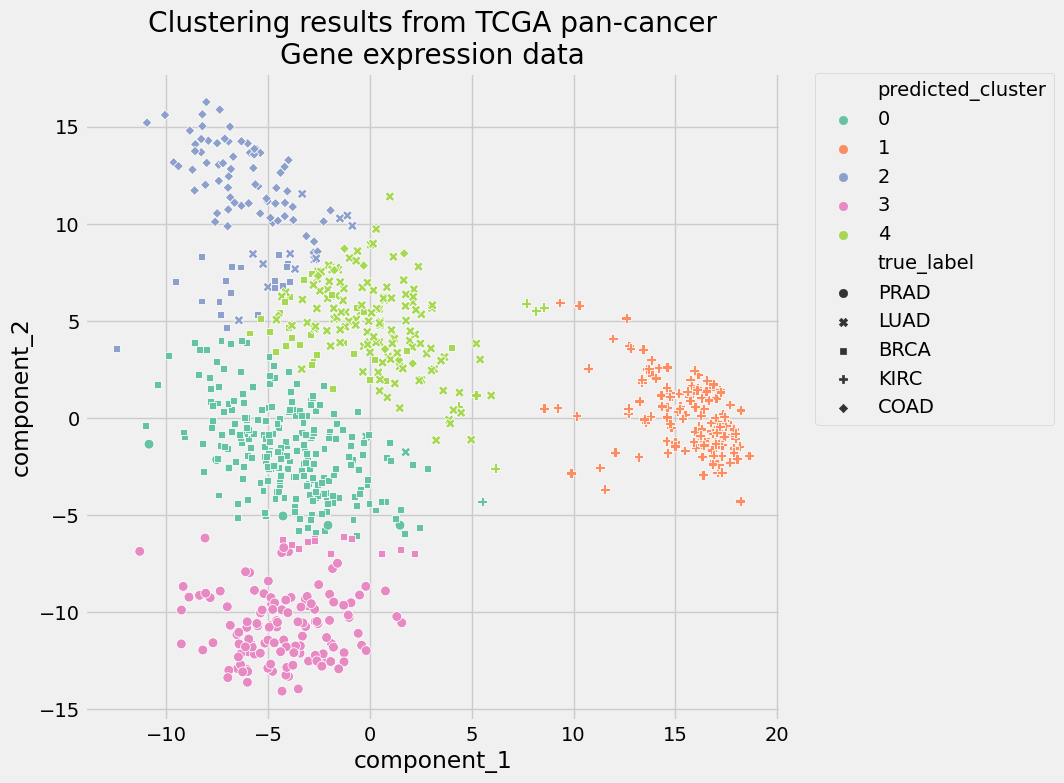

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

scat = sns.scatterplot(
    x="component_1",
    y="component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA pan-cancer\nGene expression data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

Tuning. PCA--using only two components was good for plotting but not for capturing all explained variance. Using a for loop to parameter tune PCA component number:

In [ ]:
# list of evaluation metrics
silhouette_scores = []
ari_scores = []
for n in range(2,11):
  # setting number of components for pca
  pipe["preprocessor"]["pca"].n_components = n
  pipe.fit(data)

  silhouette_coef = silhouette_score(
      pipe["preprocessor"].transform(data),
      pipe["clusterer"]["kmeans"].labels_,
  )
  ari = adjusted_rand_score(
      true_labels,
      pipe["clusterer"]["kmeans"].labels_,
  )
  #adding metrics to lists
  silhouette_scores.append(silhouette_coef)
  ari_scores.append(ari)

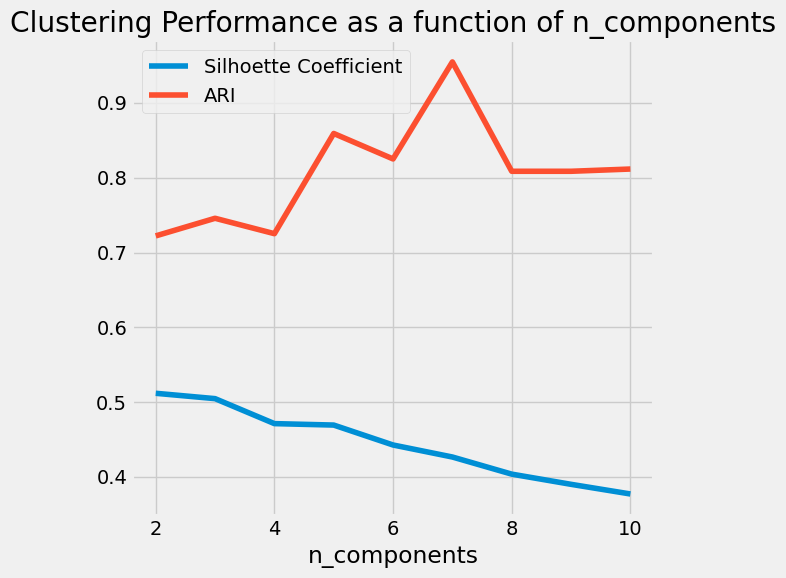

In [ ]:
#plotting evaluation metric as a function of n_components
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6,6))
plt.plot(
    range(2,11),
    silhouette_scores,
    c="#008fd5",
    label="Silhoette Coefficient",
)
plt.plot(range(2,11), ari_scores, c="#fc4f30", label="ARI")
plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a function of n_components")
plt.tight_layout()
plt.show()

Silhouette coefficient is decreasing linearly, and it is the distance between points. This means that as the dimensions increase, the sparsity increases. Larger numbers for silhouette coeffecient means the samples are closer to their cluster and further from other clusters. So, for a high number of components  the samples are further away from their clusters and closer to other clusters.
ARI improves improves as more components are added. It tapers at 7 components. ARI is adjusted rand index, which measures similarity between predicted and true labels. It's only possible to use ARI score because we have access to ground truth labels.


When the ground truth labels are available, ARI scoring is a good metric. When it's not available, silhouette coefficient is good and serves an exploratory purpose. It can reveal new clusters that are worth investigating.

In [ ]:
pipe["preprocessor"]

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('pca', PCA(n_components=10, random_state=42))])

In [ ]:
pipe["preprocessor"].transform(data).shape

number_of_components = 10
ten_components = ["component_" + str(i) for i in range(1, number_of_components + 1)]
print(ten_components)


['component_1', 'component_2', 'component_3', 'component_4', 'component_5', 'component_6', 'component_7', 'component_8', 'component_9', 'component_10']


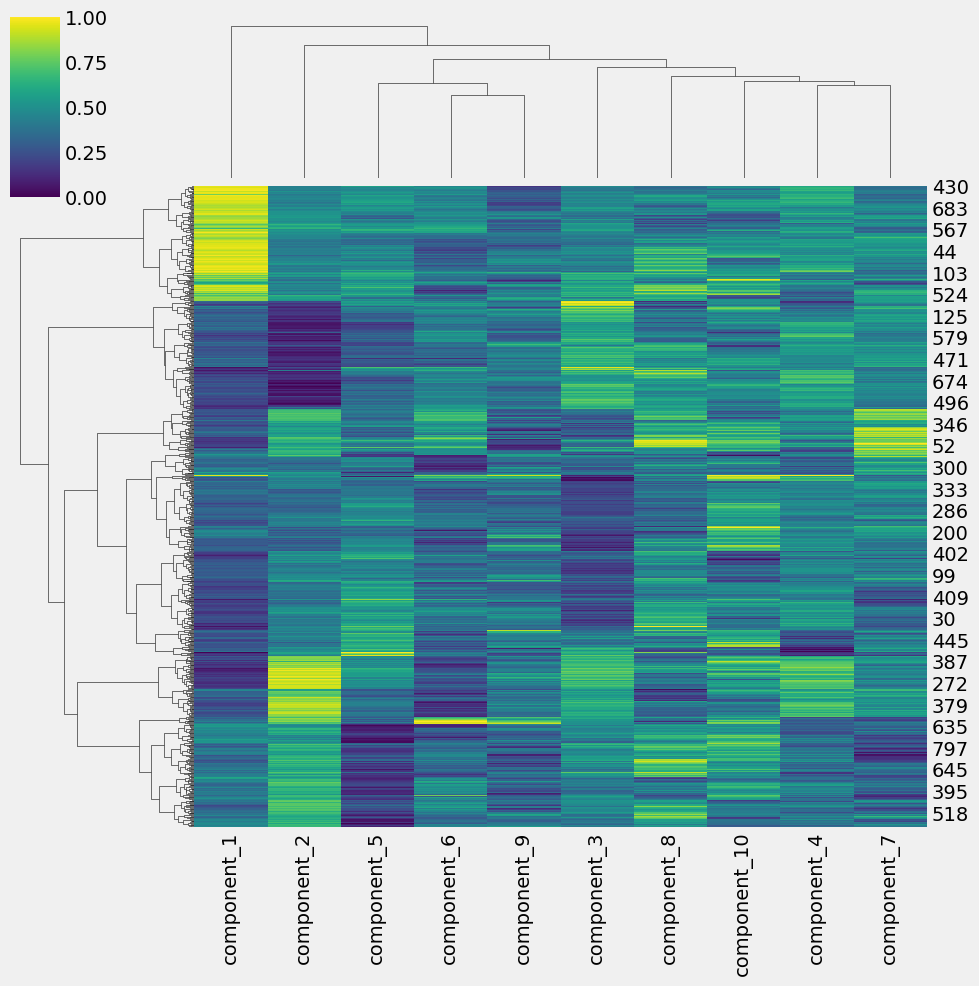

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=ten_components,
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

sns.clustermap(pcadf[ten_components], metric="euclidean", standard_scale=1, method="ward", cmap="viridis")
plt.show()


In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=ten_components,
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

scat = sns.scatterplot(
    #"component_1",
    #"component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA pan-cancer\nGene expression data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

ValueError: ignored

<Figure size 800x800 with 0 Axes>

In [ ]:
clusterer_1 = Pipeline(
    [
        (
            "kmeans",
         KMeans(
             n_clusters=n_clusters,
             init="k-means++",
             n_init=1,
             max_iter=500,
             random_state=42,
         )
        )
    ]
)

pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
     ("clusterer", clusterer_1)
    ]
)
pipe.fit(data)

pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA pan-cancer\nGene expression data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

In [ ]:
clusterer_1 = Pipeline(
    [
        (
            "kmeans",
         KMeans(
             n_clusters=n_clusters,
             init="k-means++",
             n_init=1,
             max_iter=500,
             random_state=42,
         )
        )
    ]
)
clusterer_20 = Pipeline(
    [
        (
            "kmeans",
         KMeans(
             n_clusters=n_clusters,
             init="k-means++",
             n_init=20,
             max_iter=500,
             random_state=42,
         )
        )
    ]
)
clusterer_100 = Pipeline(
    [
        (
            "kmeans",
         KMeans(
             n_clusters=n_clusters,
             init="k-means++",
             n_init=100,
             max_iter=500,
             random_state=42,
         )
        )
    ]
)
clusterer_30 = Pipeline(
    [
        (
            "kmeans",
         KMeans(
             n_clusters=n_clusters,
             init="k-means++",
             n_init=30,
             max_iter=500,
             random_state=42,
         )
        )
    ]
)